In [9]:
# Importações
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Parâmetros do problema
dx = 0.005  # Passo espacial reduzido para melhorar a precisão
C = 0.8     # Número de Courant
u = 1.0     # Velocidade de advecção
dt = C * dx / u  # Passo temporal
x = np.arange(0, 1.0 + dx, dx)  # Domínio espacial
t_final = 5.0  # Tempo final

In [10]:
# Condição inicial
def condicao_inicial(x):
    phi = 1.5 * np.exp(-200 * (x - 0.3)**2)
    phi += np.where((x >= 0.6) & (x <= 0.8), 1.5, 0.0)
    return phi

In [11]:
# Limitadores
def limitador_osher(theta):
    return np.maximum(0, np.minimum(1, theta))

def limitador_sweby(theta, beta=1.5):
    return np.maximum(0, np.minimum(beta * theta, np.minimum(1, theta)))

def limitador_van_albada(theta):
    return (theta + theta**2) / (1 + theta**2 + 1e-6)


In [12]:
# Método TVD com limitador
def metodo_tvd(phi, nt, limiter_func):
    for n in range(nt):
        phi_new = phi.copy()
        for i in range(len(phi)):
            left = (i - 1) % len(phi)
            right = (i + 1) % len(phi)
            denom_right = phi[right] - phi[i]
            denom_left = phi[i] - phi[left]
            # Evitar divisões por zero
            denom_right = denom_right + 1e-6 * (denom_right == 0)
            denom_left = denom_left + 1e-6 * (denom_left == 0)
            theta_i_plus_half = denom_left / denom_right
            theta_i_minus_half = (phi[left] - phi[(left - 1) % len(phi)]) / denom_left
            flux_left = u * phi[left] + 0.5 * abs(u) * (1 - C) * limiter_func(theta_i_minus_half) * (phi[i] - phi[left])
            flux_right = u * phi[i] + 0.5 * abs(u) * (1 - C) * limiter_func(theta_i_plus_half) * (phi[right] - phi[i])
            phi_new[i] = phi[i] - C * (flux_right - flux_left)
        phi = phi_new.copy()
    return phi

In [13]:
# Métodos específicos
def metodo_osher(phi, nt):
    return metodo_tvd(phi, nt, limitador_osher)

def metodo_sweby(phi, nt):
    return metodo_tvd(phi, nt, limitador_sweby)

def metodo_van_albada(phi, nt):
    return metodo_tvd(phi, nt, limitador_van_albada)

In [14]:
# Função para criar tabela de resultados em LaTeX
def criar_tabela_resultados(t_values, resultados, metodo):
    for t, resultado in zip(t_values, resultados):
        indices = np.linspace(0, len(x)-1, 20, dtype=int)
        data = {'x': np.round(x[indices], 6)}
        data[f'{metodo}'] = np.round(resultado[indices], 6)
        phi_exact = condicao_inicial((x - u * t) % 1.0)
        data['Solução Exata'] = np.round(phi_exact[indices], 6)
        df = pd.DataFrame(data)
        # Imprimir tabela no terminal
        print(f'Tabela de Resultados - Método {metodo} - t={t}')
        print(df)
        # Gerar código LaTeX da tabela
        latex_code = df.to_latex(index=False)
        print(f"Código LaTeX da Tabela - Método {metodo} - t={t}:")
        print(latex_code)

In [15]:
# Função para plotar e salvar resultados
def plot_resultados_separados(t, resultado, metodo):
    phi_exact = condicao_inicial((x - u * t) % 1.0)
    plt.figure(figsize=(8, 5))
    # Linha do método: azul e pontilhada
    plt.plot(x, resultado, linestyle='--', color='blue', label=f'{metodo} - t={t}')
    # Linha da advecção (solução exata): laranja e contínua
    plt.plot(x, phi_exact, linestyle='-', color='orange', label=f'Advecção - t={t}')
    plt.xlabel('x')
    plt.ylabel('ϕ(x, t)')
    plt.title(f'Solução Numérica vs Solução Exata - {metodo} - t={t}')
    plt.legend()
    plt.grid()
    # Salvar gráfico como arquivo PNG
    filename = f'resultado_{metodo.replace(" ", "_")}_t{t}.png'
    plt.savefig(filename, format='png', dpi=300)
    # Mostrar gráfico
    plt.show()

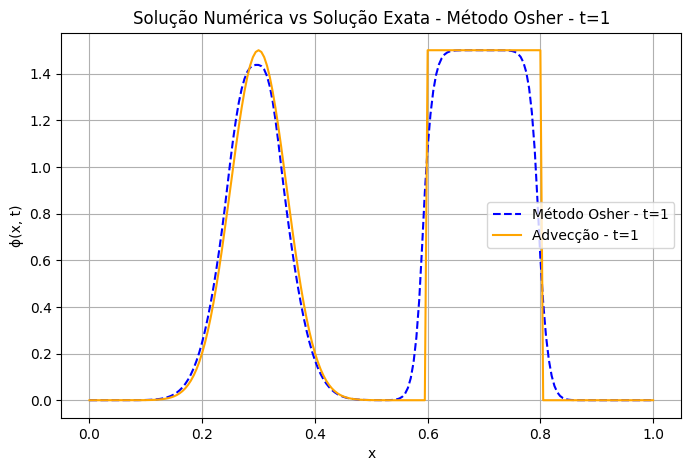

Tabela de Resultados - Método Método Osher - t=1
        x  Método Osher  Solução Exata
0   0.000      0.000000       0.000000
1   0.050      0.000018       0.000006
2   0.105      0.001481       0.000747
3   0.155      0.032840       0.022381
4   0.210      0.353657       0.296848
5   0.260      1.204556       1.089224
6   0.315      1.388984       1.433996
7   0.365      0.556926       0.644336
8   0.420      0.071790       0.084202
9   0.470      0.004421       0.004633
10  0.525      0.000270       0.000060
11  0.575      0.162219       0.000000
12  0.630      1.481797       1.500000
13  0.680      1.499996       1.500000
14  0.735      1.499642       1.500000
15  0.785      1.231354       1.500000
16  0.840      0.009353       0.000000
17  0.890      0.000001       0.000000
18  0.945      0.000000       0.000000
19  1.000      0.000000       0.000000
Código LaTeX da Tabela - Método Método Osher - t=1:
\begin{tabular}{rrr}
\toprule
    x &  Método Osher &  Solução Exata \\
\midrule

C:\Users\Maike William\AppData\Local\Temp\ipykernel_13740\2153897593.py:14: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  latex_code = df.to_latex(index=False)


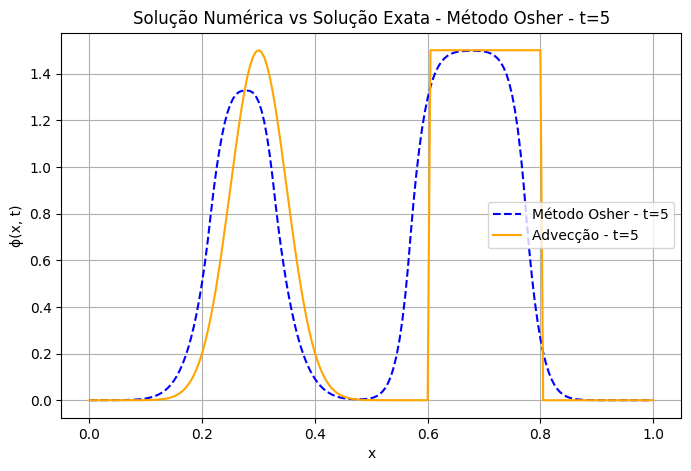

Tabela de Resultados - Método Método Osher - t=5
        x  Método Osher  Solução Exata
0   0.000      0.000010       0.000000
1   0.050      0.000371       0.000006
2   0.105      0.009958       0.000747
3   0.155      0.103796       0.022381
4   0.210      0.686272       0.296848
5   0.260      1.310229       1.089224
6   0.315      1.129512       1.433996
7   0.365      0.316473       0.644336
8   0.420      0.039211       0.084202
9   0.470      0.004720       0.004633
10  0.525      0.053086       0.000060
11  0.575      0.849918       0.000000
12  0.630      1.465623       1.500000
13  0.680      1.497563       1.500000
14  0.735      1.424899       1.500000
15  0.785      0.529289       1.500000
16  0.840      0.024719       0.000000
17  0.890      0.000482       0.000000
18  0.945      0.000002       0.000000
19  1.000      0.000007       0.000000
Código LaTeX da Tabela - Método Método Osher - t=5:
\begin{tabular}{rrr}
\toprule
    x &  Método Osher &  Solução Exata \\
\midrule

C:\Users\Maike William\AppData\Local\Temp\ipykernel_13740\2153897593.py:14: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  latex_code = df.to_latex(index=False)


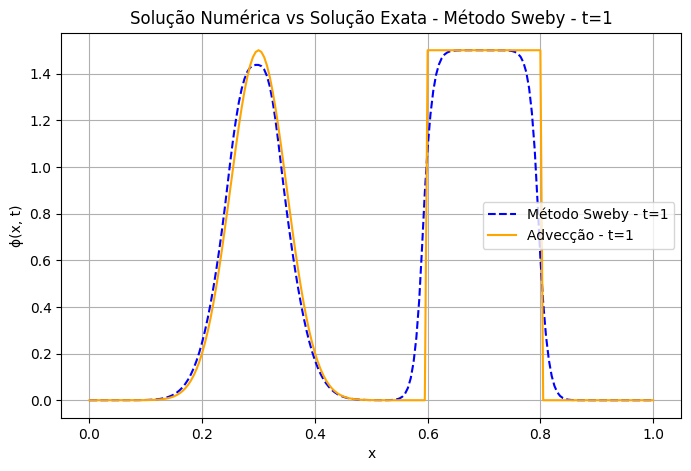

Tabela de Resultados - Método Método Sweby - t=1
        x  Método Sweby  Solução Exata
0   0.000      0.000000       0.000000
1   0.050      0.000018       0.000006
2   0.105      0.001481       0.000747
3   0.155      0.032840       0.022381
4   0.210      0.353657       0.296848
5   0.260      1.204556       1.089224
6   0.315      1.388984       1.433996
7   0.365      0.556926       0.644336
8   0.420      0.071790       0.084202
9   0.470      0.004421       0.004633
10  0.525      0.000270       0.000060
11  0.575      0.162219       0.000000
12  0.630      1.481797       1.500000
13  0.680      1.499996       1.500000
14  0.735      1.499642       1.500000
15  0.785      1.231354       1.500000
16  0.840      0.009353       0.000000
17  0.890      0.000001       0.000000
18  0.945      0.000000       0.000000
19  1.000      0.000000       0.000000
Código LaTeX da Tabela - Método Método Sweby - t=1:
\begin{tabular}{rrr}
\toprule
    x &  Método Sweby &  Solução Exata \\
\midrule

C:\Users\Maike William\AppData\Local\Temp\ipykernel_13740\2153897593.py:14: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  latex_code = df.to_latex(index=False)


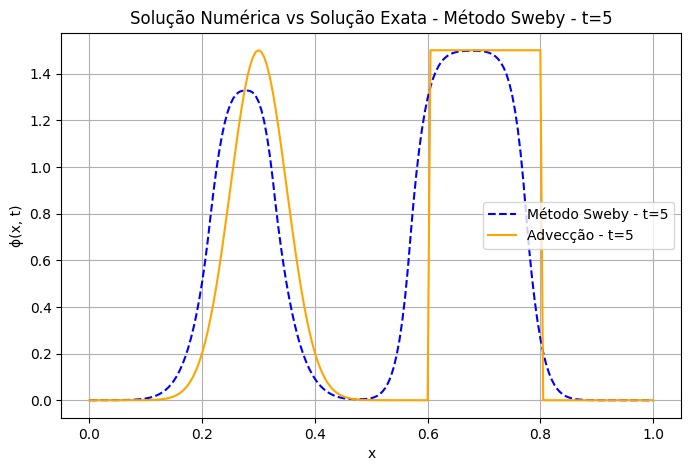

Tabela de Resultados - Método Método Sweby - t=5
        x  Método Sweby  Solução Exata
0   0.000      0.000010       0.000000
1   0.050      0.000371       0.000006
2   0.105      0.009958       0.000747
3   0.155      0.103796       0.022381
4   0.210      0.686272       0.296848
5   0.260      1.310229       1.089224
6   0.315      1.129512       1.433996
7   0.365      0.316473       0.644336
8   0.420      0.039211       0.084202
9   0.470      0.004720       0.004633
10  0.525      0.053086       0.000060
11  0.575      0.849918       0.000000
12  0.630      1.465623       1.500000
13  0.680      1.497563       1.500000
14  0.735      1.424899       1.500000
15  0.785      0.529289       1.500000
16  0.840      0.024719       0.000000
17  0.890      0.000482       0.000000
18  0.945      0.000002       0.000000
19  1.000      0.000007       0.000000
Código LaTeX da Tabela - Método Método Sweby - t=5:
\begin{tabular}{rrr}
\toprule
    x &  Método Sweby &  Solução Exata \\
\midrule

C:\Users\Maike William\AppData\Local\Temp\ipykernel_13740\2153897593.py:14: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  latex_code = df.to_latex(index=False)


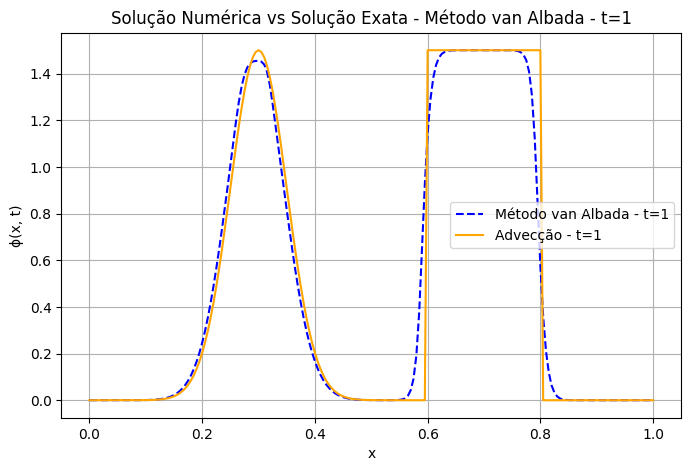

Tabela de Resultados - Método Método van Albada - t=1
        x  Método van Albada  Solução Exata
0   0.000           0.000000       0.000000
1   0.050           0.000010       0.000006
2   0.105           0.001101       0.000747
3   0.155           0.029499       0.022381
4   0.210           0.353680       0.296848
5   0.260           1.195564       1.089224
6   0.315           1.408113       1.433996
7   0.365           0.561213       0.644336
8   0.420           0.067548       0.084202
9   0.470           0.003666       0.004633
10  0.525           0.000092       0.000060
11  0.575           0.092617       0.000000
12  0.630           1.492578       1.500000
13  0.680           1.500000       1.500000
14  0.735           1.499968       1.500000
15  0.785           1.307482       1.500000
16  0.840           0.003359       0.000000
17  0.890           0.000000       0.000000
18  0.945           0.000000       0.000000
19  1.000           0.000000       0.000000
Código LaTeX da Tabela

C:\Users\Maike William\AppData\Local\Temp\ipykernel_13740\2153897593.py:14: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  latex_code = df.to_latex(index=False)


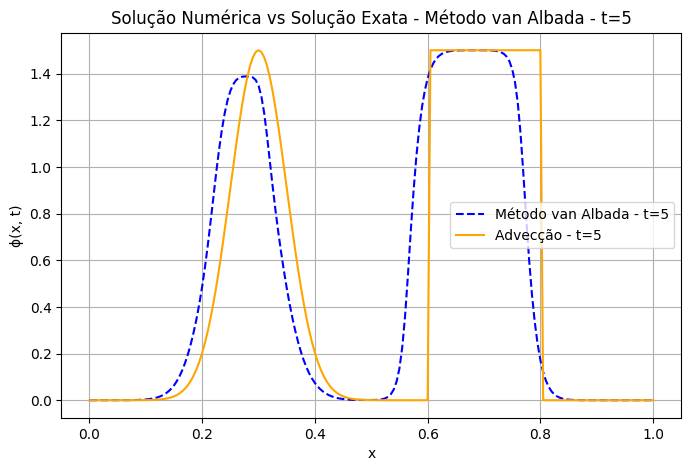

Tabela de Resultados - Método Método van Albada - t=5
        x  Método van Albada  Solução Exata
0   0.000           0.000001       0.000000
1   0.050           0.000071       0.000006
2   0.105           0.004498       0.000747
3   0.155           0.081577       0.022381
4   0.210           0.665018       0.296848
5   0.260           1.371220       1.089224
6   0.315           1.133581       1.433996
7   0.365           0.298932       0.644336
8   0.420           0.027925       0.084202
9   0.470           0.001401       0.004633
10  0.525           0.008378       0.000060
11  0.575           0.896991       0.000000
12  0.630           1.489855       1.500000
13  0.680           1.499862       1.500000
14  0.735           1.484759       1.500000
15  0.785           0.455198       1.500000
16  0.840           0.006408       0.000000
17  0.890           0.000034       0.000000
18  0.945           0.000000       0.000000
19  1.000           0.000000       0.000000
Código LaTeX da Tabela

C:\Users\Maike William\AppData\Local\Temp\ipykernel_13740\2153897593.py:14: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  latex_code = df.to_latex(index=False)


In [16]:
# Configuração inicial
phi_0 = condicao_inicial(x)

# Tempos a serem plotados
t_values = [1, 5]
nt_values = [int(t / dt) for t in t_values]

# Métodos e resultados
metodos = {
    'Método Osher': metodo_osher,
    'Método Sweby': metodo_sweby,
    'Método van Albada': metodo_van_albada
}

for nome, metodo in metodos.items():
    resultados = [metodo(phi_0.copy(), nt) for nt in nt_values]
    for t, resultado in zip(t_values, resultados):
        plot_resultados_separados(t, resultado, nome)
        criar_tabela_resultados([t], [resultado], nome)